# CosmoFlow Benchmark Scaling Analysis on Summit

In [1]:
import os
import pickle

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:

def load_config(result_dir):
    config_file = os.path.join(result_dir, 'config.pkl')
    with open(config_file, 'rb') as f:
        return pickle.load(f)

def load_result(result_dir):
    history_file = os.path.join(result_dir, 'history.csv')
    return pd.read_csv(history_file)

def compute_mean_time(r):
    return r[r.epoch>0].time.mean()

def get_num_samples(config):
    dc = config['data']
    return dc['n_train'] + dc['n_valid']

plt.rcParams.update({'font.size': 14})

## Weak Scaling on 1 node

   ranks  samples      times  throughputs
0      1      256  13.826531    18.515129
1      2      512  14.315746    35.764815
2      3      768  14.573188    52.699518
3      4     1024  15.022015    68.166619
4      5     1280  15.249899    83.934982
5      6     1536  15.231329   100.844779


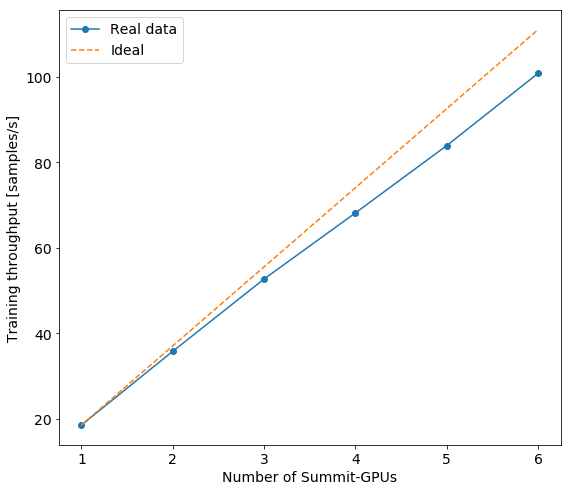

In [3]:
ranks = np.array([1, 2, 3, 4, 5, 6])
results_pattern = os.path.expandvars('../summit_output/strong_scaling/log_%i')

configs, results = [], []
for r in ranks:
    result_dir = results_pattern % r
    configs.append(load_config(result_dir))
    results.append(load_result(result_dir).assign(ranks=r))

samples = np.array([get_num_samples(c) for (c,r) in zip(configs, ranks)])
times = np.array([compute_mean_time(r) for r in results])
throughputs = samples / times

scaling_cgpu = pd.DataFrame(dict(ranks=ranks, samples=samples,
                                 times=times, throughputs=throughputs))

print(scaling_cgpu)

plt.figure(figsize=(9,8))
plt.plot(scaling_cgpu.ranks, scaling_cgpu.throughputs, 'o-', label='Real data')
plt.xlabel('Number of Summit-GPUs')
plt.ylabel('Training throughput [samples/s]')

plt.plot(scaling_cgpu.ranks, scaling_cgpu.ranks*scaling_cgpu.throughputs[0], '--', label='Ideal')
plt.legend(loc=0);
plt.show()

## Strong Scaling Multi Node

   ranks  samples      times  throughputs
0      6     1536  15.231329   100.844779
1     12     3840  20.222364   189.888782
2     24     3072   6.979907   440.120490
3     32     3072   2.617402  1173.683020
4     60     3840   2.639339  1454.909793


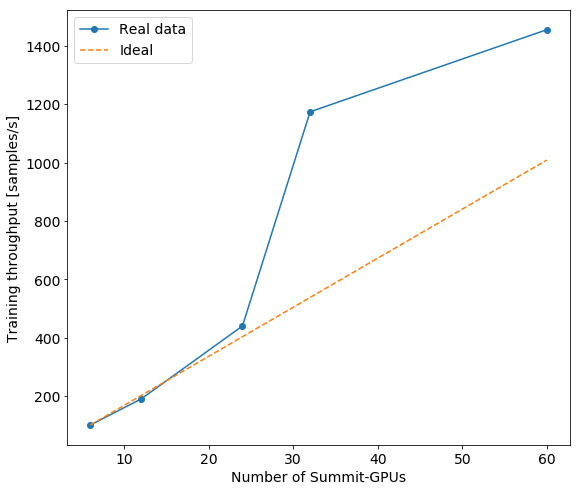

In [4]:
ranks = np.array([6, 12, 24, 32, 60])
results_pattern = os.path.expandvars('../summit_output/strong_scaling/log_%i')

configs, results = [], []
for r in ranks:
    result_dir = results_pattern % r
    configs.append(load_config(result_dir))
    results.append(load_result(result_dir).assign(ranks=r))

samples = np.array([get_num_samples(c) for (c,r) in zip(configs, ranks)])
times = np.array([compute_mean_time(r) for r in results])
throughputs = samples / times

scaling_cgpu = pd.DataFrame(dict(ranks=ranks, samples=samples,
                                 times=times, throughputs=throughputs))

print(scaling_cgpu)

plt.figure(figsize=(9,8))
plt.plot(scaling_cgpu.ranks, scaling_cgpu.throughputs, 'o-', label='Real data')
plt.xlabel('Number of Summit-GPUs')
plt.ylabel('Training throughput [samples/s]')

plt.plot(scaling_cgpu.ranks, scaling_cgpu.ranks*scaling_cgpu.throughputs[0]/6, '--', label='Ideal')
plt.legend(loc=0);
plt.show()

## Weak Scale on multi node
(Ideal is drawn from the 1st point of the dummy data)

Dummy
   ranks  samples     times   throughputs
0      6      384  2.289004    167.758588
1     12      768  2.229753    344.432693
2     24     1536  2.258355    680.141106
3     48     3072  2.270486   1353.014456
4     96     6144  2.459875   2497.687459
5    192    12288  2.571640   4778.274645
6    384    24576  2.994385   8207.360780
7    600    38400  3.132781  12257.479432
Real--data
   ranks  samples     times   throughputs
0      6      384  2.775135    138.371625
1     12      768  2.763035    277.955238
2     24     1536  2.814106    545.821721
3     48     3072  3.097452    991.783049
4     96     6144  3.153805   1948.123069
5    192    12288  3.225853   3809.225260
6    384    24576  3.404921   7217.788996
7    600    38400  3.556500  10797.131174


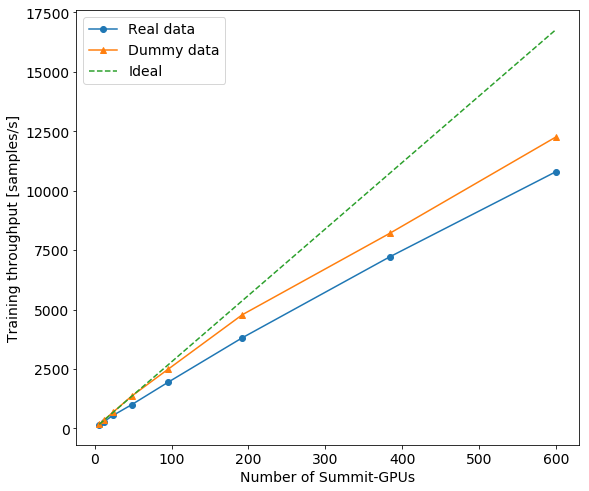

In [5]:
ranks = np.array([6, 12, 24, 48, 96, 192, 384, 600])
results_pattern = os.path.expandvars('../summit_output/weak_scaling/log_dummy_%i')

configs, results = [], []
for r in ranks:
    result_dir = results_pattern % r
    configs.append(load_config(result_dir))
    results.append(load_result(result_dir).assign(ranks=r))

samples = np.array([get_num_samples(c)*r for (c,r) in zip(configs, ranks)])
times = np.array([compute_mean_time(r) for r in results])
throughputs = samples / times

scaling_dummy = pd.DataFrame(dict(ranks=ranks, samples=samples,
                                  times=times, throughputs=throughputs))


ranks = np.array([6, 12, 24, 48, 96, 192, 384, 600])
results_pattern = os.path.expandvars('../summit_output/weak_scaling/log_%i')

configs, results = [], []
for r in ranks:
    result_dir = results_pattern % r
    configs.append(load_config(result_dir))
    results.append(load_result(result_dir).assign(ranks=r))

samples = np.array([get_num_samples(c) for (c,r) in zip(configs, ranks)])
times = np.array([compute_mean_time(r) for r in results])
throughputs = samples / times

scaling_scratch = pd.DataFrame(dict(ranks=ranks, samples=samples,
                                    times=times, throughputs=throughputs))

print("Dummy")
print(scaling_dummy)
print("Real--data")
print(scaling_scratch)


plt.figure(figsize=(9,8))
plt.plot(scaling_scratch['ranks'], scaling_scratch['throughputs'], 'o-', label='Real data')
plt.plot(scaling_dummy['ranks'], scaling_dummy['throughputs'], '^-', label='Dummy data')
plt.xlabel('Number of Summit-GPUs')
plt.ylabel('Training throughput [samples/s]')

plt.plot(scaling_scratch.ranks, scaling_scratch.ranks*scaling_dummy['throughputs'][0]/6, '--', label='Ideal')
plt.legend(loc=0);
plt.show()

## Weak Scale on multi node
(Ideal is drawn from the 1st point of the real data)

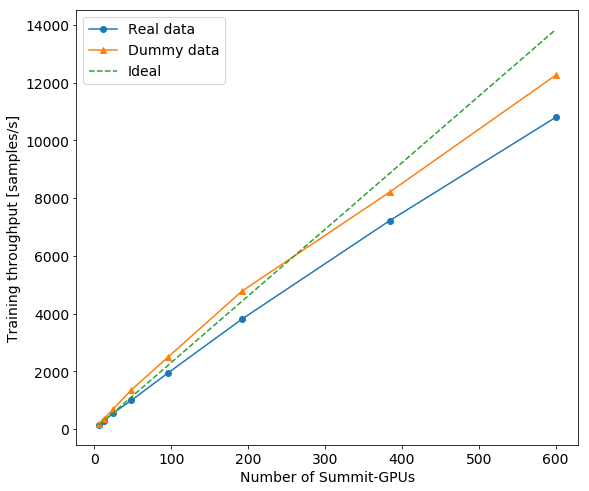

In [6]:
plt.figure(figsize=(9,8))
plt.plot(scaling_scratch['ranks'], scaling_scratch['throughputs'], 'o-', label='Real data')
plt.plot(scaling_dummy['ranks'], scaling_dummy['throughputs'], '^-', label='Dummy data')
plt.xlabel('Number of Summit-GPUs')
plt.ylabel('Training throughput [samples/s]')

plt.plot(scaling_scratch.ranks, scaling_scratch.ranks*scaling_scratch['throughputs'][0]/6, '--', label='Ideal')
plt.legend(loc=0);
plt.show()